In [1]:
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datetime = pd.read_csv(r"D:\Le Hieu\Data Science\ekyc daytime.csv",parse_dates = ['Created'])
datetime['Created'] = pd.to_datetime(datetime['Created'],format ="%Y-%m-%d %H:%M:%S")
datetime

,Created,day,Recording URL,Publicly Shared,Already Watched,Favorited,Tags,Notes,Landing Page URL,Exit Page URL,...,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New User,Country,Device,Browser,Operating System
0,2021-02-15 17:09:39,2021-02-15,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,b0d5248c,False,VN,Phone,Chrome,Android
1,2021-02-16 02:38:46,2021-02-16,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,dc26ecf8,False,VN,Desktop,Chrome,Windows
2,2021-02-16 02:10:50,2021-02-16,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,fa705590,True,US,Phone,Safari,Ios
3,2021-02-16 02:42:39,2021-02-16,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,98c05a6f,True,VN,Phone,Samsung,Android
4,2021-02-16 02:29:10,2021-02-16,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,5610b398,True,VN,Phone,Chrome,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,2021-03-17 15:51:01,2021-03-17,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online,...,False,False,NaN,NaN,ac285995,True,VN,Phone,Safari,Ios
3528,2021-03-17 18:00:59,2021-03-17,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online,...,False,False,NaN,NaN,1783609f,True,VN,Phone,Safari,Ios
3529,2021-03-17 17:58:19,2021-03-17,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online,...,False,False,NaN,NaN,42c96152,True,VN,Phone,Safari,Ios
3530,2021-03-18 01:42:56,2021-03-18,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online,https://invest.vcsc.com.vn/mo-tai-khoan-online,...,False,False,NaN,NaN,35ed4666,False,VN,Phone,Chrome,Android


In [3]:
datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Created              3532 non-null   datetime64[ns]
 1   day                  3532 non-null   object        
 2   Recording URL        3532 non-null   object        
 3   Publicly Shared      3532 non-null   bool          
 4   Already Watched      3532 non-null   bool          
 5   Favorited            3532 non-null   bool          
 6   Tags                 0 non-null      float64       
 7   Notes                0 non-null      float64       
 8   Landing Page URL     3532 non-null   object        
 9   Exit Page URL        3532 non-null   object        
 10  Referrer URL         2756 non-null   object        
 11  Action Count         3532 non-null   int64         
 12  Page Count           3532 non-null   int64         
 13  Duration (seconds)   3532 non-nul

In [4]:
a = datetime.groupby('day').sum()

In [5]:
a = a.reset_index()
a

,day,Publicly Shared,Already Watched,Favorited,Tags,Notes,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,New User
0,2021-02-15,0.0,0.0,0.0,0.0,0.0,1,1,1115,0.0,0.0,0.0,0.0,0.0
1,2021-02-16,0.0,1.0,0.0,0.0,0.0,1129,42,10861,1.0,1.0,0.0,0.0,29.0
2,2021-02-17,0.0,0.0,0.0,0.0,0.0,4401,227,57833,2.0,2.0,0.0,0.0,181.0
3,2021-02-18,1.0,6.0,0.0,0.0,0.0,5945,271,78410,6.0,0.0,0.0,0.0,213.0
4,2021-02-19,0.0,0.0,0.0,0.0,0.0,4395,225,59446,0.0,1.0,0.0,0.0,181.0
5,2021-02-20,0.0,1.0,0.0,0.0,0.0,1776,80,21112,1.0,1.0,0.0,0.0,55.0
6,2021-02-21,0.0,0.0,0.0,0.0,0.0,851,50,8770,0.0,1.0,0.0,0.0,36.0
7,2021-02-22,0.0,0.0,0.0,0.0,0.0,3340,123,39325,2.0,0.0,0.0,0.0,76.0
8,2021-02-23,0.0,0.0,0.0,0.0,0.0,2005,76,34496,1.0,0.0,0.0,0.0,53.0
9,2021-02-24,0.0,0.0,0.0,0.0,0.0,2898,113,37486,2.0,0.0,0.0,0.0,88.0


## Kiểm tra lượng user truy cập mới có giảm theo thời gian hay không

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

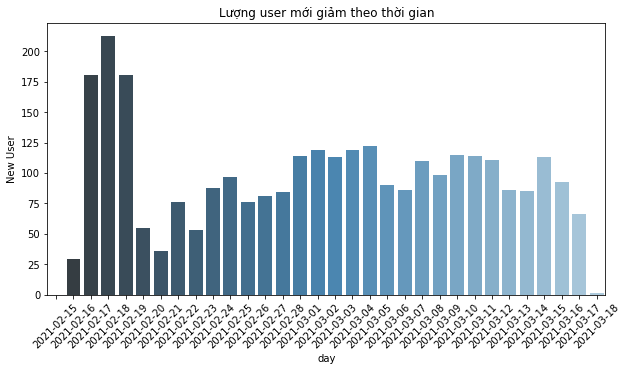

In [6]:
#fig, ax = plt.subplots(figsize = (12,6)
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='New User',data = a,palette="Blues_d")
plt.title('Lượng user mới giảm theo thời gian')
plt.xticks(rotation=45)

## Kiểm tra nguồn traffic nào giảm theo thời gian

In [7]:
datetime.groupby('Referrer URL').count()

,Created,day,Recording URL,Publicly Shared,Already Watched,Favorited,Tags,Notes,Landing Page URL,Exit Page URL,...,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New User,Country,Device,Browser,Operating System
Referrer URL,,,,,,,,,,,,,,,,,,,,,
http://m.facebook.com,15,15,15,15,15,15,0,0,15,15,...,15,15,0,0,15,15,15,15,15,15
http://m.facebook.com/,30,30,30,30,30,30,0,0,30,30,...,30,30,0,0,30,30,30,30,30,30
http://ra.vcsc.com.vn/,4,4,4,4,4,4,0,0,4,4,...,4,4,0,0,4,4,4,4,4,4
https://ampproject.org/,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
https://chat.zalo.me/,22,22,22,22,22,22,0,0,22,22,...,22,22,0,0,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.vcsc.com.vn/viewContact.do,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
https://www.vcsc.com.vn/who-we-are,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
https://www.youtube.com/,6,6,6,6,6,6,0,0,6,6,...,6,6,0,0,6,6,6,6,6,6


#### Gộp các nguồn link

In [8]:
datetime = datetime.fillna('Direct')

In [9]:
df = datetime

In [10]:
df.loc[df['Referrer URL'].str.contains('google'), 'Referrer URL'] = 'google'
df.loc[df['Referrer URL'].str.contains('facebook'), 'Referrer URL'] = 'facebook'
df.loc[df['Referrer URL'].str.contains('zalo'), 'Referrer URL'] = 'zalo'
df.loc[df['Referrer URL'].str.contains('vcsc.com.vn'), 'Referrer URL'] = 'website vcsc'
df.loc[df['Referrer URL'].str.contains('fbclid'), 'Referrer URL'] = 'facebook'
df.loc[df['Referrer URL'].str.contains('fili'), 'Referrer URL'] = 'vietstock'
df.loc[df['Referrer URL'].str.contains('vinacorp'), 'Referrer URL'] = 'cafef banner'
df.loc[df['Referrer URL'].str.contains('cafef'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('nhipcaudautu'), 'Referrer URL'] = 'nhipcaudautu'
df.loc[df['Referrer URL'].str.contains('youtube'), 'Referrer URL'] = 'youtube'
df.loc[df['Referrer URL'].str.contains('vietstock'), 'Referrer URL'] = 'vietstock'
df.loc[df['Referrer URL'].str.contains('cdn.'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('linkedin'), 'Referrer URL'] = 'linkedin'
df.loc[df['Referrer URL'].str.contains('admicro'), 'Referrer URL'] = 'cafef banner'
df.loc[df['Referrer URL'].str.contains('coccoc.com'), 'Referrer URL'] = 'Coc Coc'
df.loc[df['Referrer URL'].str.contains('dantri.com.vn'), 'Referrer URL'] = 'Dan Tri'
df.loc[df['Referrer URL'].str.contains('zingnews'), 'Referrer URL'] = 'zingnews'
df.loc[df['Referrer URL'].str.contains('skype'), 'Referrer URL'] = 'Skype'

In [11]:
df1 = []
df1 = pd.DataFrame(df1)
df1['day'] = df['day']
df1['Referrer URL'] = df['Referrer URL']
df1 = df1.set_index('day')
df1 = pd.get_dummies(df1)
df1 = df1.groupby('day').sum()
df2 = df1
df1 = df1.reset_index()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   day                                           32 non-null     object
 1   Referrer URL_Coc Coc                          32 non-null     uint8 
 2   Referrer URL_Direct                           32 non-null     uint8 
 3   Referrer URL_facebook                         32 non-null     uint8 
 4   Referrer URL_google                           32 non-null     uint8 
 5   Referrer URL_https://ampproject.org/          32 non-null     uint8 
 6   Referrer URL_https://mail.phs.vn/             32 non-null     uint8 
 7   Referrer URL_https://www.cafechungkhoan.com   32 non-null     uint8 
 8   Referrer URL_https://www.cafechungkhoan.com/  32 non-null     uint8 
 9   Referrer URL_https://www.easystock.vn         32 non-null     uint8 
 10  Refe

In [13]:
df1

,day,Referrer URL_Coc Coc,Referrer URL_Direct,Referrer URL_facebook,Referrer URL_google,Referrer URL_https://ampproject.org/,Referrer URL_https://mail.phs.vn/,Referrer URL_https://www.cafechungkhoan.com,Referrer URL_https://www.cafechungkhoan.com/,Referrer URL_https://www.easystock.vn,Referrer URL_website vcsc,Referrer URL_youtube,Referrer URL_zalo
0,2021-02-15,0,0,0,1,0,0,0,0,0,0,0,0
1,2021-02-16,0,12,2,1,1,0,0,1,0,15,0,0
2,2021-02-17,0,40,3,122,0,0,0,0,0,27,1,3
3,2021-02-18,0,53,7,129,0,0,0,1,0,47,1,2
4,2021-02-19,0,35,2,127,0,0,0,0,0,32,2,3
5,2021-02-20,0,8,2,34,0,0,0,0,0,22,1,1
6,2021-02-21,0,7,1,18,0,0,0,0,0,16,0,0
7,2021-02-22,0,29,1,13,0,0,0,0,0,54,0,2
8,2021-02-23,0,28,1,4,0,0,0,0,0,31,0,0
9,2021-02-24,0,42,7,35,0,0,1,0,0,18,0,1


In [14]:
df2 = df2.transpose()
df2

day,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21,2021-02-22,2021-02-23,2021-02-24,...,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18
Referrer URL_Coc Coc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_Direct,0,12,40,53,35,8,7,29,28,42,...,27,45,30,29,21,16,40,31,15,0
Referrer URL_facebook,0,2,3,7,2,2,1,1,1,7,...,1,1,3,1,2,1,0,2,1,0
Referrer URL_google,1,1,122,129,127,34,18,13,4,35,...,51,58,63,66,59,54,57,42,0,0
Referrer URL_https://ampproject.org/,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://mail.phs.vn/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://www.cafechungkhoan.com,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://www.cafechungkhoan.com/,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://www.easystock.vn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Referrer URL_website vcsc,0,15,27,47,32,22,16,54,31,18,...,46,28,46,28,20,26,45,44,60,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

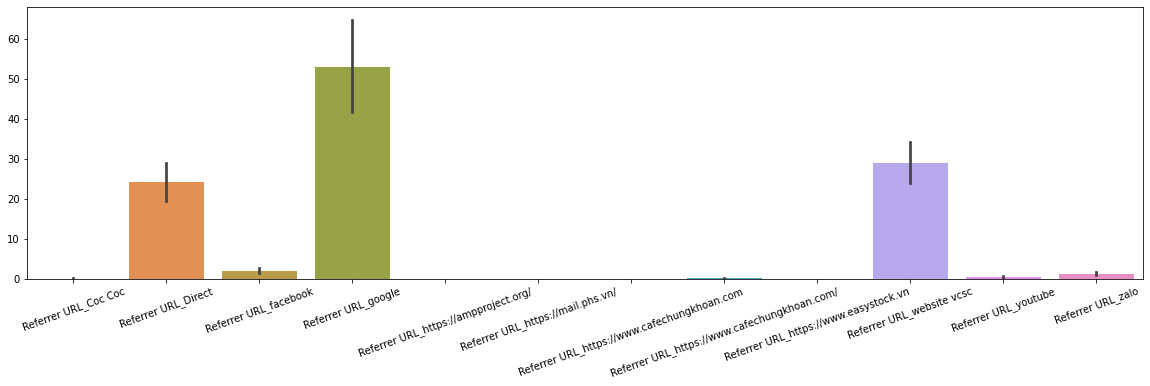

In [15]:
plt.figure(figsize = (20,5))
sns.barplot(data = df1)
plt.xticks(rotation=20)

In [18]:
df2

day,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21,2021-02-22,2021-02-23,2021-02-24,...,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18
Referrer URL_Coc Coc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_Direct,0,12,40,53,35,8,7,29,28,42,...,27,45,30,29,21,16,40,31,15,0
Referrer URL_facebook,0,2,3,7,2,2,1,1,1,7,...,1,1,3,1,2,1,0,2,1,0
Referrer URL_google,1,1,122,129,127,34,18,13,4,35,...,51,58,63,66,59,54,57,42,0,0
Referrer URL_https://ampproject.org/,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://mail.phs.vn/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://www.cafechungkhoan.com,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://www.cafechungkhoan.com/,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_https://www.easystock.vn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Referrer URL_website vcsc,0,15,27,47,32,22,16,54,31,18,...,46,28,46,28,20,26,45,44,60,2


In [24]:
df2 = df2.reset_index()
df2.to_csv(r'D:\Le Hieu\ekyc new.csv', index = False)